In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Connecting to SQLite database

In [4]:
conn = sqlite3.connect("car_sales.db")
cursor = conn.cursor()

### Creating the car_sales table if it doesn't exist

In [7]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS car_sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        model TEXT,
        quantity INTEGER,
        price REAL
    )
''')

In [9]:
cursor.execute("DELETE FROM car_sales")
conn.commit()

## Insert sample car sales data

In [12]:
car_sales_data = [
    ("Toyota Camry", 5, 24000),
    ("Honda Civic", 8, 22000),
    ("Ford Mustang", 3, 35000),
    ("Toyota Camry", 4, 24000),
    ("Honda Civic", 6, 22000),
    ("Ford Mustang", 2, 35000),
    ("Tesla Model 3", 7, 45000),
    ("Tesla Model 3", 5, 45000)]

In [14]:
cursor.executemany("INSERT INTO car_sales (model, quantity, price) VALUES (?, ?, ?)", car_sales_data)
conn.commit()

In [16]:
query = """
    SELECT 
        model, 
        SUM(quantity) AS total_sold, 
        SUM(quantity * price) AS total_revenue 
    FROM car_sales 
    GROUP BY model
"""

In [18]:
df = pd.read_sql_query(query, conn)

In [20]:
print("Car Sales Summary:")
print(df)

Car Sales Summary:
           model  total_sold  total_revenue
0   Ford Mustang           5       175000.0
1    Honda Civic          14       308000.0
2  Tesla Model 3          12       540000.0
3   Toyota Camry           9       216000.0


<Figure size 1000x600 with 0 Axes>

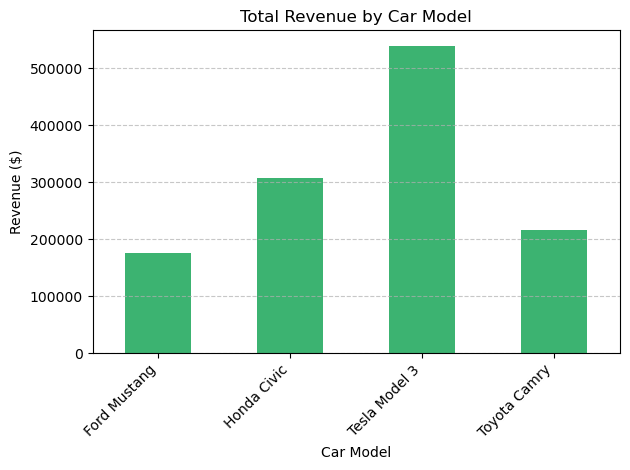

In [22]:
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='model', y='total_revenue', legend=False, color='mediumseagreen')
plt.title('Total Revenue by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and/or show the chart
plt.savefig("car_sales_chart.png")
plt.show()

In [24]:
conn.close()